Yasemin Çıkıkçı S009590
Homework-1

In [ ]:
!pip install yfinance
import yfinance as yf
DTRY = yf.download("TRY=X", start='2020-01-01', end='2023-12-15')['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [ ]:
rDTRY=DTRY.diff().dropna()

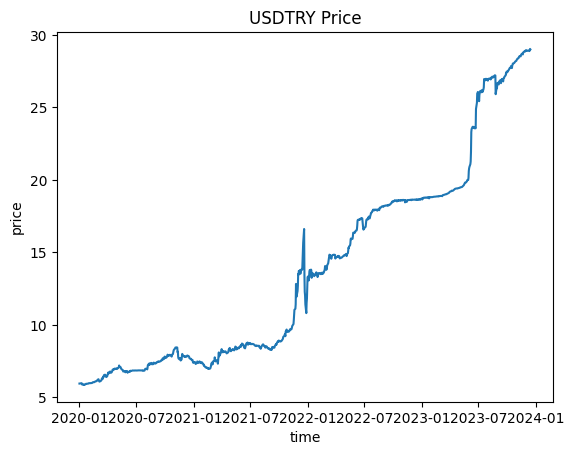

In [ ]:
import matplotlib.pyplot as plt
plt.plot(DTRY)
plt.xlabel('time')
plt.ylabel('price')
plt.title('USDTRY Price')
plt.show()

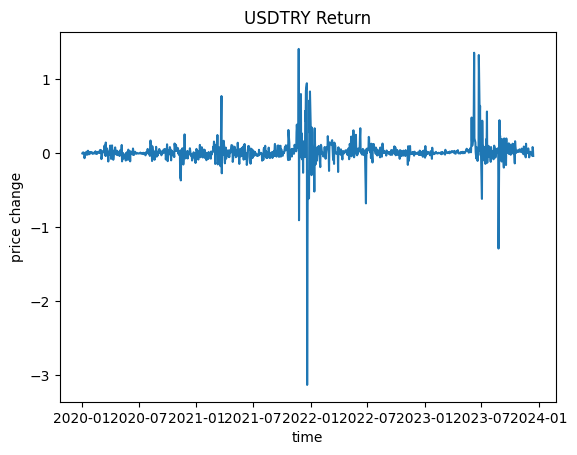

In [ ]:
plt.plot(rDTRY)
plt.xlabel('time')
plt.ylabel('price change')
plt.title('USDTRY Return')
plt.show()

1)	Perform KPSS and Augmented Dickey-Fuller tests on DTRY and rDTRY series. Comment. Conclude. (3 pts)  

rDTRY has a trend, we choose ct as regression. DTRY hasn't any trend, we choose c as regression.

In [ ]:
from statsmodels.tsa.stattools import kpss
kpss1=kpss(DTRY,regression='ct',nlags='auto',store=False)
kpss2=kpss(rDTRY,regression='c',nlags='auto',store=False)

<ipython-input-37-26c9a167a5d7>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss1=kpss(DTRY,regression='ct',nlags='auto',store=False)


In [ ]:
kpss1

(0.8593780767109989,
 0.01,
 19,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

Actual p value is smaller than the returned p value. Reject null hypothesis. Not stationary.

In [ ]:
kpss2

(0.5192309744043105,
 0.037335366125155284,
 0,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

Do not reject null hypothesis. It is stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf1=adfuller(DTRY,regression='ct')
adf2=adfuller(rDTRY,regression='c')

In [ ]:
adf1

(-1.7636247258288926,
 0.7220281335007157,
 21,
 1010,
 {'1%': -3.9677614634121485,
  '5%': -3.414845832687729,
  '10%': -3.1296138693838014},
 -614.3587515900551)

Actual p value is smaller than the returned p value. Reject null hypothesis. There isn't any unit root.

In [ ]:
adf2

(-5.88621420046894,
 2.9973771875027054e-07,
 22,
 1008,
 {'1%': -3.4368539989632336,
  '5%': -2.864411567265667,
  '10%': -2.568298955065823},
 -614.6311724018676)

Actual p value is higher than the returned p value. Do not reject null hypothesis. There is a unit root.

Here, we can continue with rDTRY which is stationary and which has unit root. These are the conditions to model.

2)	Plot the ACF and PACF for the rDTRY series setting the maximum lag to 12. (0.5 pt)

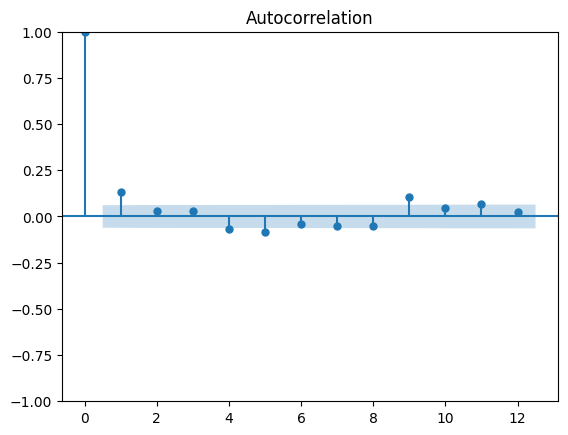

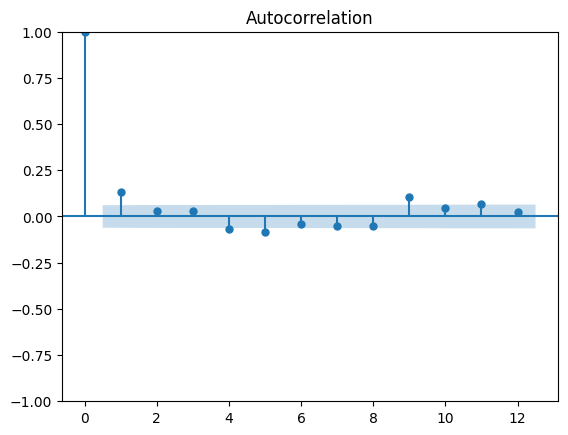

In [ ]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(rDTRY, alpha=0.05, lags=12)

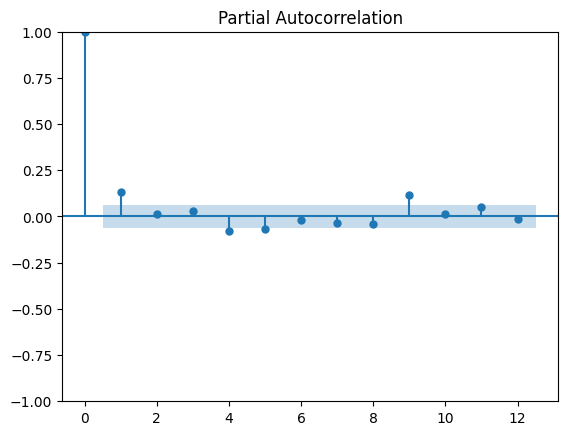

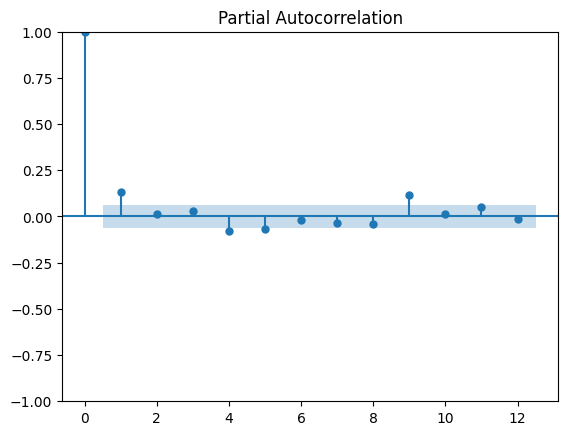

In [ ]:
plot_pacf(rDTRY, alpha=0.05, lags=12)

3)	For an AR model, which model orders would you try based on the plots you created above. Comment. (1 pt)

1,4,5,9 lags are seen as significant from graphs. But we should also check it with ar_select_order.

In [ ]:
from statsmodels.tsa.ar_model import ar_select_order
mod=ar_select_order(rDTRY, maxlag=12, ic='aic',glob=True)
mod.ar_lags

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


[1, 4, 5, 8, 9, 11]

It gives us 1,4,5,8,9,11 lags. We could try AR(1), AR(4), AR(5), AR(8), AR(9), AR(11).

4)	Estimate each AR model that you determined in question 3. Compare the models based on the Akaike’s information criterion. Which model would you prefer. Justify your choice. Call your preferred model m1. (1.5 pts)

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
# AR(1)
model_ar1 = AutoReg(rDTRY, lags=1).fit()
aic_ar1 = model_ar1.aic
# AR(4)
model_ar4 = AutoReg(rDTRY, lags=4).fit()
aic_ar4 = model_ar4.aic
# AR(5)
model_ar5 = AutoReg(rDTRY, lags=5).fit()
aic_ar5 = model_ar5.aic
# AR(8)
model_ar8 = AutoReg(rDTRY, lags=8).fit()
aic_ar8 = model_ar8.aic
# AR(9)
model_ar9 = AutoReg(rDTRY, lags=9).fit()
aic_ar9 = model_ar9.aic
# AR(11)
model_ar11 = AutoReg(rDTRY, lags=11).fit()
aic_ar11 = model_ar11.aic
print(aic_ar1, aic_ar4, aic_ar5, aic_ar8,aic_ar9,aic_ar11)

-608.9630214944169 -605.5287266568129 -606.7181217748142 -599.838356322427 -609.5282195533285 -605.4299686461076


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dat

Since aic_ar9 has the smallest value, we select AR(9) as m1 model.

5)	Perform Ljung-Box test to check the validity of the m1 model. Comment. Conclude. (1 pt)

The Ljung-Box test is a statistical test used in time series analysis to assess whether there are significant autocorrelations in a given time series at different lags.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
ar9arima = ARIMA(rDTRY, order=(9, 0, 0)).fit()
print(ar9arima.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1031
Model:                 ARIMA(9, 0, 0)   Log Likelihood                 322.767
Date:                Thu, 28 Dec 2023   AIC                           -623.534
Time:                        21:23:27   BIC                           -569.213
Sample:                    01-02-2020   HQIC                          -602.919
                         - 12-14-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0223      0.008      2.628      0.009       0.006       0.039
ar.L1          0.1290      0.009     14.454      0.000       0.112       0.147
ar.L2          0.0111      0.024      0.470      0.6

ar.L1, ar.L4, ar.L5, ar.L9 are significant. Because their P values are less than 0.05. ar.L1 has highest coefficient and lowest standard error.

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(ar9arima.resid, lags=[10], model_df=9)
print(lb_test)

     lb_stat  lb_pvalue
10  4.137778   0.041936


 We use Ljung-Box test to check that the residuals from a time series model resemble white noise.

H_{0}: there are no significant autocorrelations in the time series, that means there is white noise

H_{a}: there are significant autocorrelations in the time series, that means there isn't a white noise

 P value is higher than 0.05. Do not reject null hypothesis, there is white noise. That means AR(9) is an efficient model. It fits to the data. AR(9) is our m1 model.

6)	Refine the m1 model by excluding all the insignificant variables. Call the refined model m2. Write down the refined model explicitly. (3 pts).

Depending to selected orders by ar_select_order which are 1,4,5,9 are stated here as 1. Other variables which are independents are stated as 0 here.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
ar9arima=ARIMA(rDTRY,order=((1,0,0,1,1,0,0,0,1),0,0)).fit()
print(ar9arima.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


                                   SARIMAX Results                                   
Dep. Variable:                     Adj Close   No. Observations:                 1031
Model:             ARIMA([1, 4, 5, 9], 0, 0)   Log Likelihood                 318.990
Date:                       Thu, 28 Dec 2023   AIC                           -625.979
Time:                               21:28:59   BIC                           -596.349
Sample:                           01-02-2020   HQIC                          -614.734
                                - 12-14-2023                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0223      0.008      2.912      0.004       0.007       0.037
ar.L1          0.1360      0.009     14.943      0.000       0.118       0.

Refined Model: Yt-u= Constant + B1*( Yt-1-
u) + B4 * ( Yt-4-u)+ B5 * ( Yt-5-u) + B9 * ( Yt-9-u)

Constant is 0.0223, and the coeffiecients are 0.1360, -0.0568, -0.0603 and 0.1024 respectively.

ar.L1 has highest coefficient, and lowest standard error.

7)	Perform Ljung-Box test to check the validity of the m2 model. Comment. Conclude. (1 pt)

We have 4 lags left.

In [ ]:
lb_test3 = acorr_ljungbox(ar9arima.resid, lags=[10], model_df=4)
print(lb_test3)

    lb_stat  lb_pvalue
10  7.29119   0.294756


P value is higher than 0.05. Do not reject H0, there is white noise. That means m2 is an efficient model. It fits to the data.

8)	Identify an alternative ARIMA model by using the auto arima module. Call the model m3. Estimate the model. (2 pts)

In [ ]:
!pip install pmdarima
from pmdarima.arima import auto_arima

In [ ]:
auto_arima(rDTRY)

ARIMA(order=(3, 0, 3), scoring_args={}, suppress_warnings=True)

AR(3) or MA(3)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
ar3arima = ARIMA(rDTRY, order=(3, 0, 3)).fit()
print(ar3arima.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1031
Model:                 ARIMA(3, 0, 3)   Log Likelihood                 318.873
Date:                Thu, 28 Dec 2023   AIC                           -621.746
Time:                        21:34:07   BIC                           -582.240
Sample:                    01-02-2020   HQIC                          -606.754
                         - 12-14-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0223      0.007      3.078      0.002       0.008       0.037
ar.L1          0.6299      0.088      7.158      0.000       0.457       0.802
ar.L2          0.3612      0.124      2.918      0.0

P values are less than 0.05. They are significant. ma.L3 has highest coefficient and lowest standard error.

9)	Perform Ljung-Box test to the check the validity of the model m3. Comment. Conclude. (1 pt)

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test4 = acorr_ljungbox(ar3arima.resid, lags=[10], model_df=6)
print(lb_test4)

      lb_stat  lb_pvalue
10  11.613588   0.020468


P value is less than 0.05. m3 should be ARMA(3,3). Reject H0. There isn't white noise. Model doesn't fit to the data.

10)	Compare the models m1, m2, m3. Which model would you prefer? Comment. Justify your choice. (1 pt)

m3 model doesn't fit to the data. So we eliminate it.

AR(9) as m1 has -623.534 as AIC value.

m2 has -625.979 as AIC value.

We should select the model with the minimum AIC, so we prefer m2 with dropped insignificant lags.

